In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from scipy.fftpack import fft
from scipy.signal import welch

from siml.sk_utils import *
from siml.signal_analysis_utils import *

from tqdm import tqdm
import ast

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\user\Desktop\FYP\kaggle'

#### Data Exploration

In [2]:
meta_train = pd.read_csv(path+'\metadata_train.csv')


In [3]:
meta_train.head()

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1


In [4]:
meta_train.shape

(6000, 4)

In [5]:
meta_train.isnull().any()

signal_id         False
id_measurement    False
phase             False
target            False
dtype: bool

In [6]:
list(range(0,len(meta_train))) == list(meta_train['signal_id'])

True

In [7]:
meta_train.head()

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1


In [8]:
train1 = pq.read_table(path+'/train.parquet', columns = [str(i) for i in range (1000)]).to_pandas()

In [9]:
train2 = pq.read_table(path+'/train.parquet', columns = [str(i) for i in range (1000,2000)]).to_pandas()

In [10]:
train3 = pq.read_table(path+'/train.parquet', columns = [str(i) for i in range (2000,3000)]).to_pandas()

In [11]:
train4 = pq.read_table(path+'/train.parquet', columns = [str(i) for i in range (3000,4000)]).to_pandas()

In [12]:
train5 = pq.read_table(path+'/train.parquet', columns = [str(i) for i in range (4000,5000)]).to_pandas()

In [13]:
train6 = pq.read_table(path+'/train.parquet', columns = [str(i) for i in range (5000,6000)]).to_pandas()

In [14]:
train7 = pq.read_table(path+'/train.parquet', columns = [str(i) for i in range (6000,7000)]).to_pandas()

In [15]:
train8 = pq.read_table(path+'/train.parquet', columns = [str(i) for i in range (7000,8000)]).to_pandas()

In [16]:
train9 = pq.read_table(path+'/train.parquet', columns = [str(i) for i in range (8000,8172)]).to_pandas()

In [17]:
train = pd.concat([train1,train2,train3,train4,train5,train6,train7,train8,train9],axis=1)

In [18]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171
0,18,1,-19,-16,-5,19,-15,15,-1,-16,...,-7,7,-22,10,13,3,-17,6,11,-25
1,18,0,-19,-17,-6,19,-17,16,0,-15,...,-6,7,-22,9,14,4,-19,7,12,-25
2,17,-1,-20,-17,-6,19,-17,15,-3,-15,...,-7,7,-22,9,16,7,-18,8,12,-24
3,18,1,-19,-16,-5,20,-16,16,0,-15,...,-8,7,-21,10,11,1,-18,9,13,-24
4,18,0,-19,-16,-5,20,-17,16,-2,-14,...,-8,8,-21,10,13,5,-22,8,13,-25


In [19]:
train.shape

(800000, 8172)

In [25]:
train.values.max()

127

In [26]:
train.values.min()

-128

In [21]:
sns.set(style="darkgrid")

<AxesSubplot:xlabel='target', ylabel='count'>

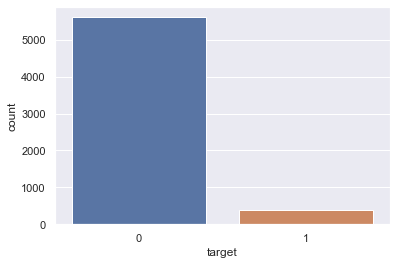

In [22]:
sns.countplot(x='target', data = meta_train)

<AxesSubplot:xlabel='target', ylabel='count'>

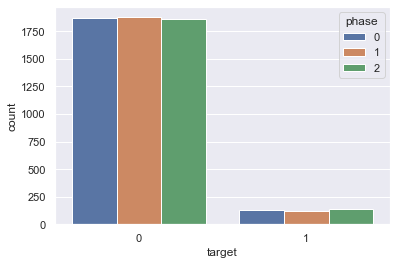

In [23]:
sns.countplot(x='target', hue = 'phase', data = meta_train)

In [24]:
for i in range (0 , len(meta_train), 3):
    temp1 = meta_train.loc[i]['target']
    flag = 0
    
    for j in range (1,3):
        temp2 = meta_train.loc[i+j]['target']
        if temp1 != temp2:
            print(meta_train.loc[i:i+2])
            flag = 1
    if flag == 1:
        break

     signal_id  id_measurement  phase  target
201        201              67      0       1
202        202              67      1       1
203        203              67      2       0


In [25]:
train['0'].describe()

count    800000.000000
mean         -0.960271
std          13.870733
min         -39.000000
25%         -13.000000
50%          -1.000000
75%          11.000000
max          33.000000
Name: 0, dtype: float64

(array([-50., -40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

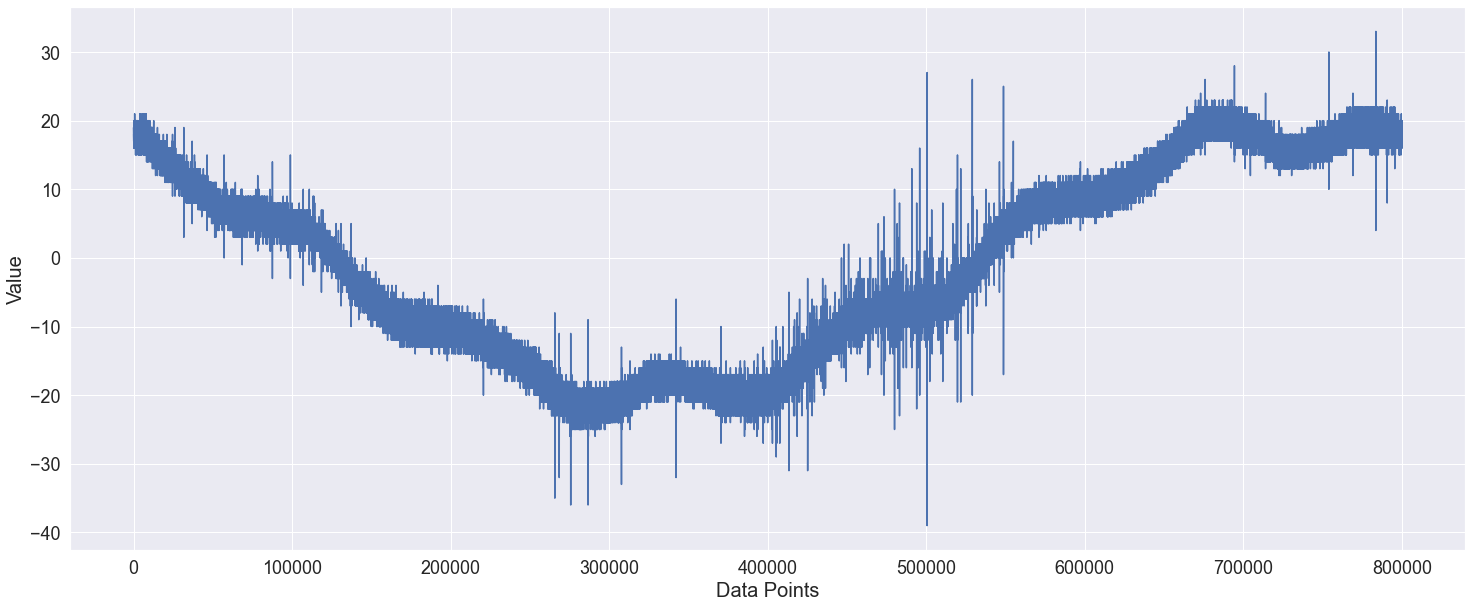

In [26]:
train['0'].plot(figsize=(25,10))
plt.xlabel('Data Points', fontsize = 20)
plt.ylabel('Value', fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

(array([-50., -40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

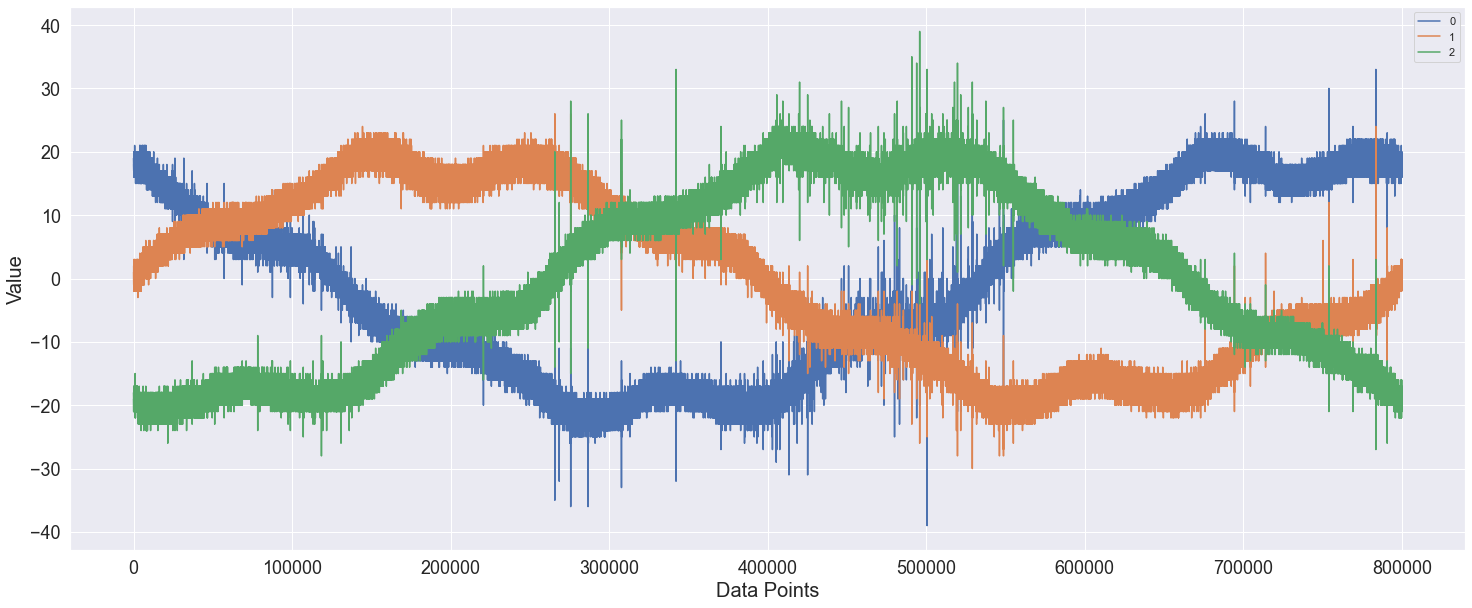

In [27]:
train.loc[:,'0':'2'].plot(figsize=(25,10))
plt.xlabel('Data Points', fontsize = 20)
plt.ylabel('Value', fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [28]:
meta_train.loc[meta_train['target']==1]

,signal_id,id_measurement,phase,target
3,3,1,0,1
4,4,1,1,1
5,5,1,2,1
201,201,67,0,1
202,202,67,1,1
...,...,...,...,...
5732,5732,1910,2,1
5943,5943,1981,0,1
5944,5944,1981,1,1
5945,5945,1981,2,1


(array([-60., -40., -20.,   0.,  20.,  40.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

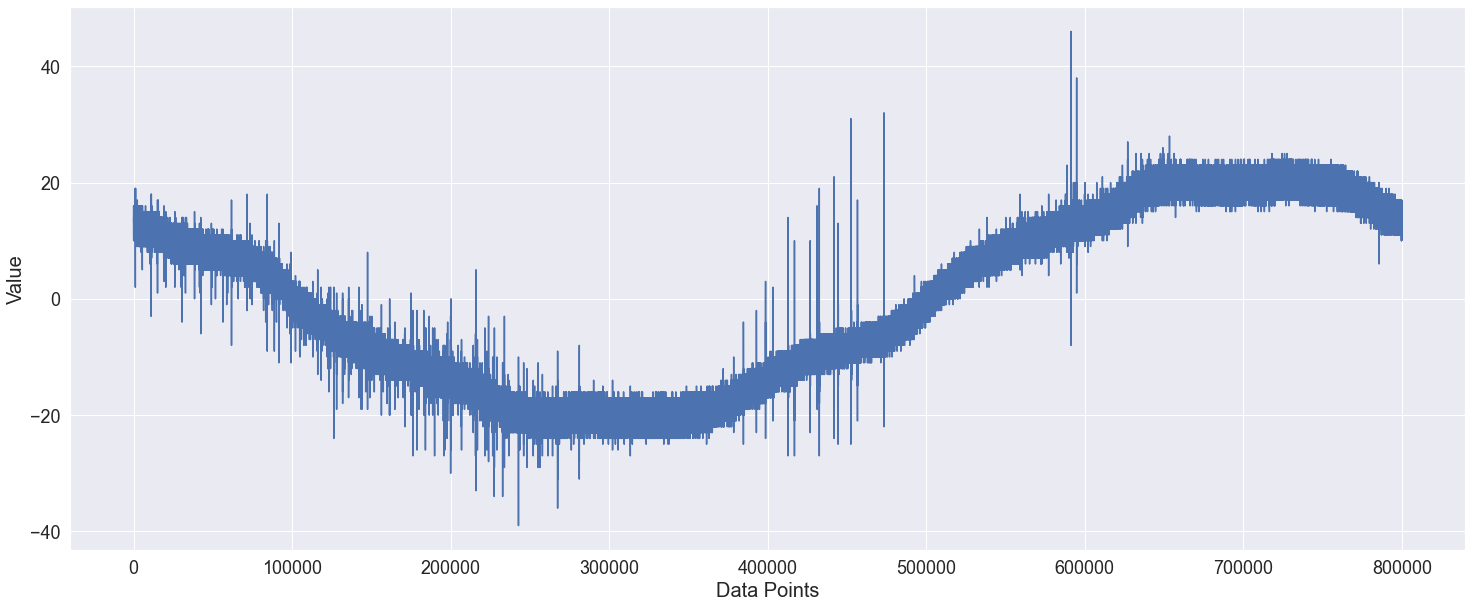

In [29]:
train['202'].plot(figsize=(25,10))
plt.xlabel('Data Points', fontsize = 20)
plt.ylabel('Value', fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [31]:
signal_data =pq.read_pandas(path+'/train.parquet',columns=[str(i) for i in range(9)]).to_pandas()

In [32]:
phase_sums_0 = [[0]*len(signal_data['0'])]*3
phase_sums_1 = [[0]*len(signal_data['0'])]*3

In [33]:
#going through each signal
for i in tqdm(range(len(meta_train))):
    signal = pq.read_pandas(path+'/train.parquet',columns=[str(i)]).to_pandas()[str(i)].values
    
    #phase 
    phase = meta_train.loc[meta_train['signal_id'] == i]['phase'][i]
    
    #target value 
    target = meta_train.loc[meta_train['signal_id'] == i]['target'][i]
    
    #storing the min,max of signal
    #sums for calculating mean
    if target == 0:
        phase_sums_0[phase] += signal 
    elif target == 1:
        phase_sums_1[phase] += signal 

100%|██████████████████████████████████████████████████████████████████████████████| 6000/6000 [28:37<00:00,  3.49it/s]


In [34]:
mean_df = pd.DataFrame(columns=['ps0_0','ps0_1','ps0_2','ps1_0','ps1_1','ps1_2'])

In [35]:
mean_df['ps0_0'] = phase_sums_0[0]/len(meta_train[(meta_train['phase']==0 )& (meta_train['target']==0)])
mean_df['ps0_1'] = phase_sums_0[1]/len(meta_train[(meta_train['phase']==1 )& (meta_train['target']==0)])
mean_df['ps0_2'] = phase_sums_0[2]/len(meta_train[(meta_train['phase']==2 )& (meta_train['target']==0)])

mean_df['ps1_0'] = phase_sums_1[0]/len(meta_train[(meta_train['phase']==0 )& (meta_train['target']==1)])
mean_df['ps1_1'] = phase_sums_1[1]/len(meta_train[(meta_train['phase']==1 )& (meta_train['target']==1)])
mean_df['ps1_2'] = phase_sums_1[2]/len(meta_train[(meta_train['phase']==2 )& (meta_train['target']==1)])

In [36]:
mean_df.to_csv(path+'\signal_means.csv',index=False)

In [21]:
mean_df = pd.read_csv(path+'\signal_means.csv',index_col=False)

In [22]:
mean_df.head()

,ps0_0,ps0_1,ps0_2,ps1_0,ps1_1,ps1_2
0,-1.210385,-0.916977,0.177921,-0.825758,-0.123967,0.119403
1,-1.256424,-0.974454,0.105038,-1.037879,-0.330579,-0.074627
2,-1.296039,-0.997339,0.117899,-0.840909,-0.421488,-0.141791
3,-1.225375,-0.964875,0.118971,-0.931818,-0.454545,0.074627
4,-1.250535,-0.962746,0.146302,-0.916667,-0.074380,-0.059701


(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

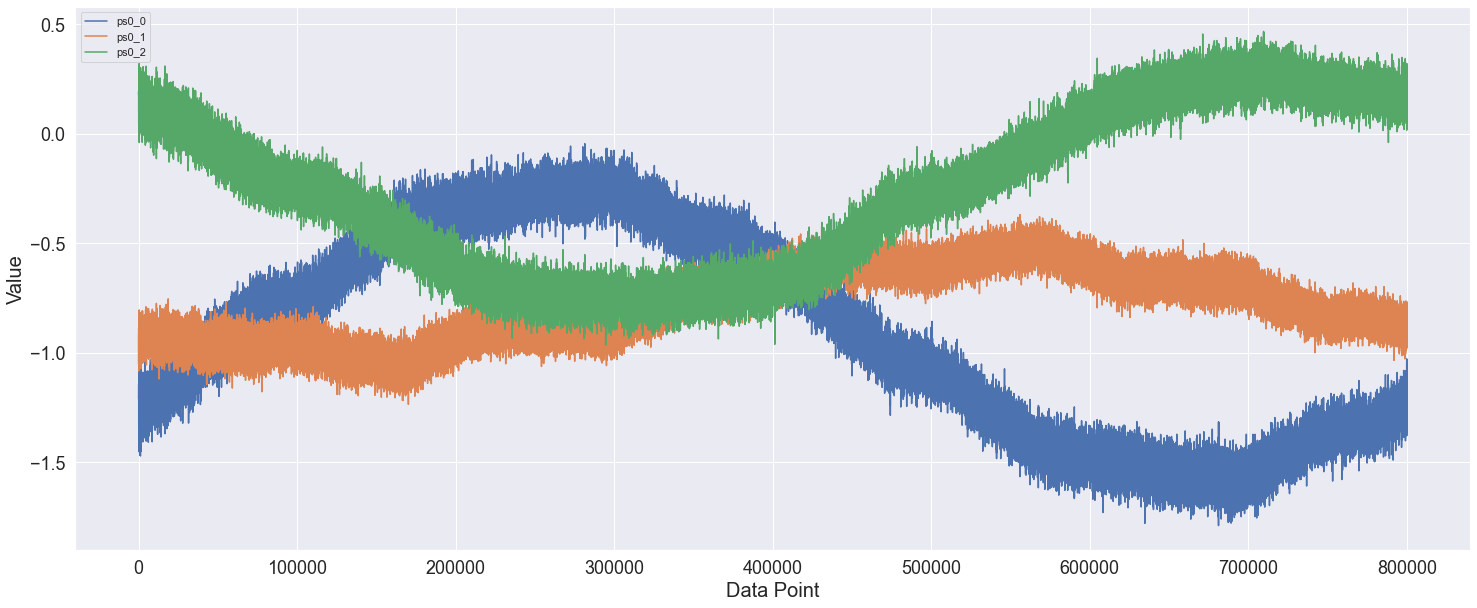

In [38]:
mean_df.loc[:,'ps0_0':'ps0_2'].plot(figsize=(25,10))
plt.xlabel('Data Point',fontsize=20) 
plt.ylabel('Value',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

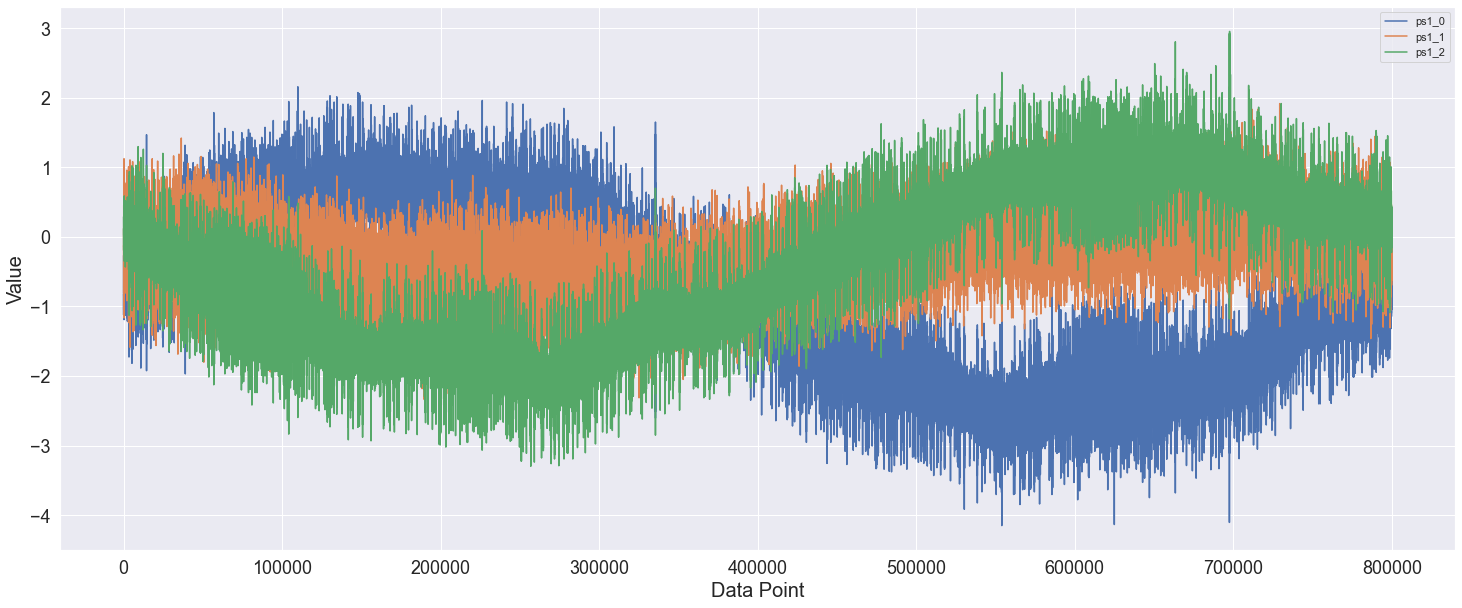

In [39]:
mean_df.loc[:,'ps1_0':'ps1_2'].plot(figsize=(25,10))
plt.xlabel('Data Point',fontsize=20) 
plt.ylabel('Value',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

##### Extracting statistical data

In [40]:
stats_df = pd.DataFrame(columns=['signal_id','mean','std','min','max','band_width','percentiles','target'])

In [41]:
for index,row in tqdm(meta_train.iterrows()):
    
    stats = []
    signal =  pq.read_pandas(path+'/train.parquet',columns=[str(row['signal_id'])]).to_pandas()[str(row['signal_id'])].values
    
    #signal_id
    stats.append(row['signal_id'])
    
    #mean
    stats.append(signal.mean())
    
    #std
    stats.append(signal.std())
    
    #min
    stats.append(signal.min())
    
    #max
    stats.append(signal.max())
    
    #bandwidth
    band_width = [signal.mean()+signal.std(),signal.mean()-signal.std()]
    stats.append(band_width)
    
    #percentiles of signal
    stats.append(np.percentile(signal, [0, 1, 25, 50, 75, 99, 100]))
    
    #target
    stats.append(row['target'])
    

    
    stats_df.loc[len(stats_df)] = stats
    

6000it [30:37,  3.26it/s]


In [42]:
stats_df.to_csv(path+'\stats_data.csv',index=False)

In [43]:
stats_df = pd.read_csv(path+'\stats_data.csv',index_col=False)

Text(0, 0.5, 'Probability Density')

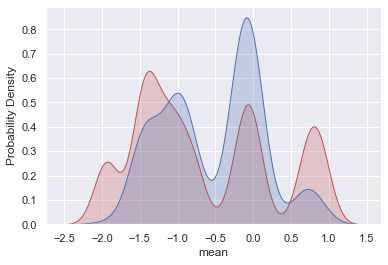

In [44]:
sns.kdeplot(stats_df.loc[(stats_df['target']==0), 
            'mean'], color='r', shade=True, Label='target 0') 
  
sns.kdeplot(stats_df.loc[(stats_df['target']==1),  
            'mean'], color='b', shade=True, Label='target 1') 
  
plt.xlabel('mean') 
plt.ylabel('Probability Density') 

Text(0, 0.5, 'Probability Density')

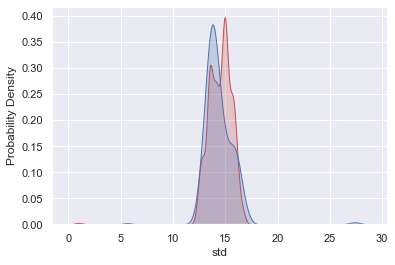

In [45]:
sns.kdeplot(stats_df.loc[(stats_df['target']==0), 
            'std'], color='r', shade=True, Label='target 0') 
  
sns.kdeplot(stats_df.loc[(stats_df['target']==1),  
            'std'], color='b', shade=True, Label='target 1') 
  
plt.xlabel('std') 
plt.ylabel('Probability Density') 

In [48]:
bw1 = []
bw2 = []
#extracting bandwiths from stats_df
for index,row in stats_df.iterrows():
    bw = ast.literal_eval(row['band_width'])
    bw1.append(bw[0])
    bw2.append(bw[1])
stats_df['band_width_1'] = bw1
stats_df['band_width_2'] = bw2

Text(0, 0.5, 'Probability Density')

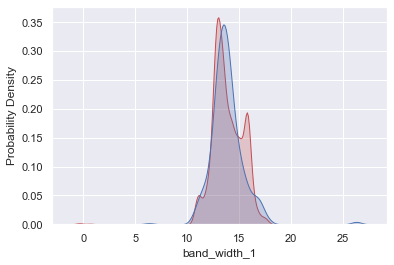

In [49]:
sns.kdeplot(stats_df.loc[(stats_df['target']==0), 
            'band_width_1'], color='r', shade=True, Label='target 0') 
  
sns.kdeplot(stats_df.loc[(stats_df['target']==1),  
            'band_width_1'], color='b', shade=True, Label='target 1') 
  
plt.xlabel('band_width_1') 
plt.ylabel('Probability Density') 

Text(0, 0.5, 'Probability Density')

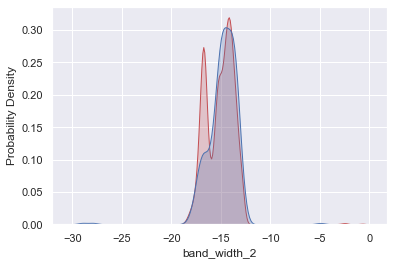

In [50]:
sns.kdeplot(stats_df.loc[(stats_df['target']==0), 
            'band_width_2'], color='r', shade=True, Label='target 0') 
  
sns.kdeplot(stats_df.loc[(stats_df['target']==1),  
            'band_width_2'], color='b', shade=True, Label='target 1') 
  
plt.xlabel('band_width_2') 
plt.ylabel('Probability Density') 

##### Percentiles

In [51]:
percentiles = pd.DataFrame(columns=['p-1','p-2','p-3','p-4','p-5','p-6','p-7','target'])

In [52]:
#extracting percentiles from stats _df
for index,row in stats_df.iterrows():
    pers = row['percentiles'][1:-1].split()
    pers = [float(i) for i in pers]
    pers.append(row['target'])
    percentiles.loc[len(percentiles)] = pers

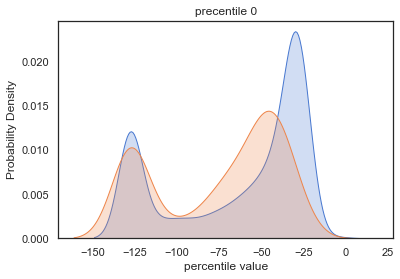

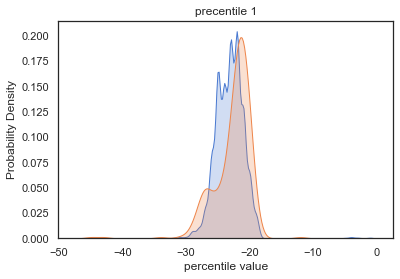

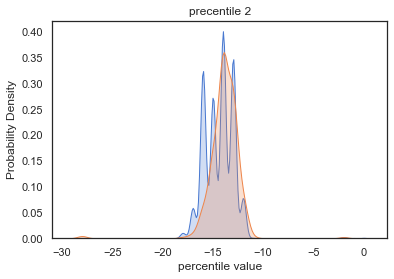

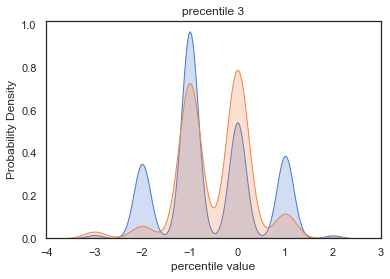

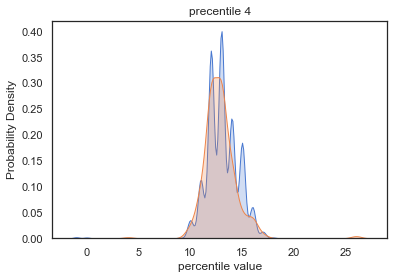

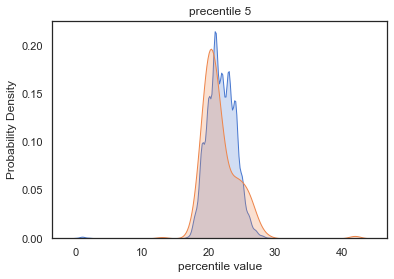

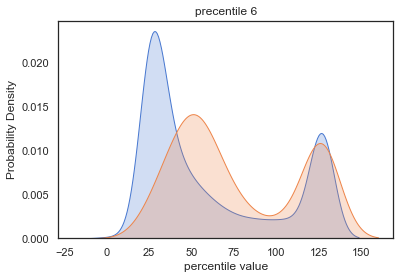

In [53]:
#plotting pdf of each percentile
for i in range(7):
    sns.set(style="white", palette="muted", color_codes=True)
    sns.kdeplot(percentiles.loc[(stats_df['target']==0), 
            'p-'+str(i+1)], shade=True, Label='target 0')  
    sns.kdeplot(percentiles.loc[(stats_df['target']==1), 
            'p-'+str(i+1)], shade=True, Label='target 1')
    plt.title('precentile '+str(i))
    plt.xlabel('percentile value') 
    plt.ylabel('Probability Density') 
    plt.show()